<a href="https://colab.research.google.com/github/Loki-33/Stuffs/blob/main/Hopfield_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from copy import deepcopy
import torch.nn.functional as F

In [4]:
def load_mnist(batch_size, norm_factor=1):
  transform = transforms.Compose([transforms.ToTensor()])
  trainset = torchvision.datasets.MNIST(root='./mnist_data', train=True,
                                        download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                            shuffle=True)
  trainset = list(iter(trainloader))
  testset = torchvision.datasets.MNIST(root='./mnist_data', train=False,
                                       download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False)
  testset = list(iter(testloader))
  for i, (img,label) in enumerate(trainset):
    trainset[i] = (img.reshape(len(img), 784)/norm_factor, label)
  for i, (img,label) in enumerate(testset):
    testset[i] = (img.reshape(len(img), 784)/norm_factor, label)
  return trainset, testset

In [5]:
trainset, testset = load_mnist(1000)

100%|██████████| 9.91M/9.91M [00:00<00:00, 136MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 41.7MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 92.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.87MB/s]


In [6]:
# hopfield networks only work with binary values [-1, 1] not [0, 1]
def binarize(img):
  i = deepcopy(img)
  i[img>0] = -1
  i[img<=0] = 1
  return i

In [7]:
def zero_bottom(img):
  i = deepcopy(img)
  H,W = img.shape
  i[H//2:H, :] = -1
  return i

In [12]:
trainset[0]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 8, 6, 4, 1, 1, 3, 4, 6, 3, 4, 8, 2, 6, 1, 0, 1, 3, 6, 3, 1, 4, 5, 3,
         0, 9, 5, 1, 7, 7, 4, 7, 7, 2, 2, 3, 5, 0, 1, 8, 9, 9, 9, 5, 6, 8, 3, 5,
         2, 1, 9, 9, 9, 4, 4, 1, 5, 3, 6, 2, 6, 1, 2, 3, 1, 8, 7, 6, 9, 5, 5, 6,
         5, 3, 0, 7, 6, 8, 9, 0, 3, 1, 3, 3, 7, 8, 7, 0, 2, 8, 8, 3, 9, 8, 0, 2,
         0, 2, 4, 4, 6, 2, 2, 1, 3, 3, 6, 2, 3, 0, 5, 0, 1, 7, 7, 4, 2, 8, 5, 1,
         1, 1, 1, 5, 1, 0, 1, 2, 9, 6, 2, 2, 4, 1, 7, 2, 4, 4, 8, 6, 9, 8, 7, 1,
         7, 7, 6, 0, 3, 0, 5, 9, 1, 7, 8, 4, 4, 5, 9, 8, 5, 0, 2, 7, 1, 2, 2, 9,
         1, 8, 7, 8, 3, 1, 4, 9, 1, 6, 3, 4, 3, 3, 2, 1, 7, 5, 6, 9, 4, 5, 2, 9,
         7, 7, 1, 4, 9, 2, 4, 8, 8, 0, 2, 2, 5, 1, 1, 4, 4, 6, 1, 9, 1, 3, 6, 5,
         

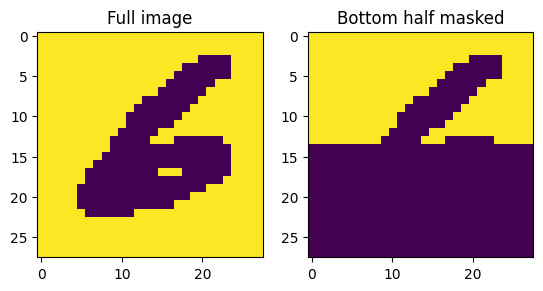

In [13]:
imgs,labels = trainset[0]
digit = imgs[2,:].reshape(784,1)
digit = binarize(digit)
halved_digit = zero_bottom(digit.reshape(28,28)).reshape(784,1)
plt.subplot(1,2,1)
plt.title("Full image")
plt.imshow(digit.reshape(28,28))
plt.subplot(1,2,2)
plt.title("Bottom half masked")
plt.imshow(halved_digit.reshape(28,28))
plt.show()

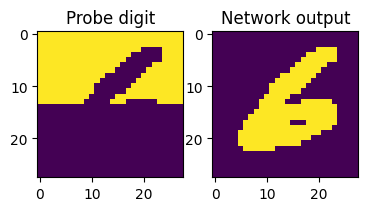

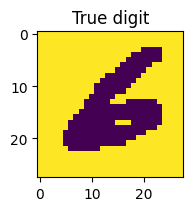

In [28]:
W = digit@digit.T
out=binarize(W @ halved_digit -)

plt.subplot(1,3,1)
plt.title('Probe digit')
plt.imshow(halved_digit.reshape(28,28))
plt.subplot(1,3,2)
plt.title('Network output')
plt.imshow(out.reshape(28,28))
plt.show()
plt.subplot(1,3,3)
plt.title('True digit')
plt.imshow(digit.reshape(28,28))
plt.show()

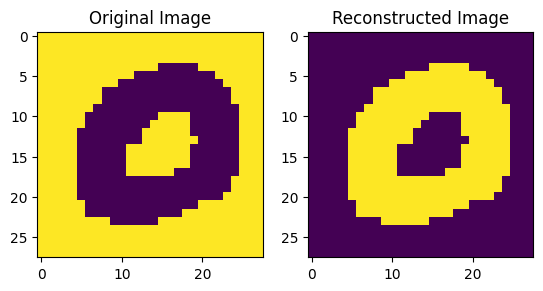

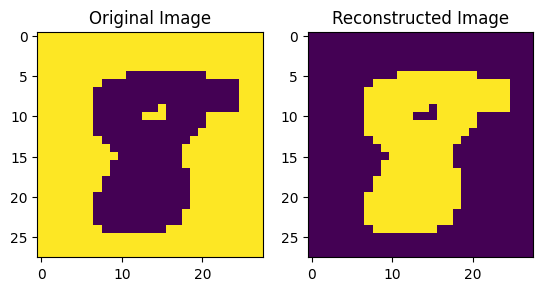

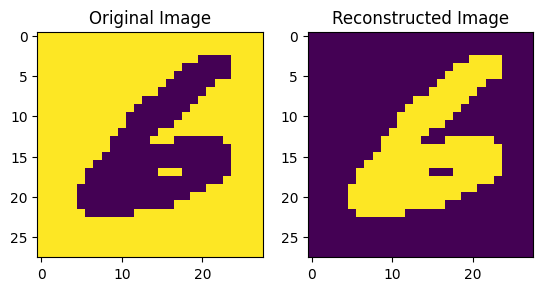

In [21]:
def store_retrieve_N_images(N):
  W = torch.zeros((784,784))
  for i in range(N):
    digit = binarize(imgs[i,:].reshape(784,1))
    W += digit @ digit.T

  for i in range(N):
    digit = binarize(imgs[i,:]).reshape(28,28)
    halved_digit = zero_bottom(digit).reshape(784,1)
    out = binarize(W @ halved_digit)
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(digit)
    plt.subplot(1,2,2)
    plt.title("Reconstructed Image")
    plt.imshow(out.reshape(28,28))
    plt.show()

store_retrieve_N_images(3)

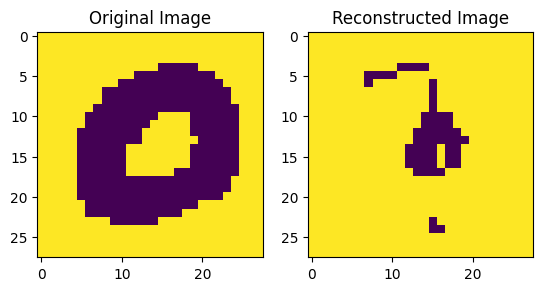

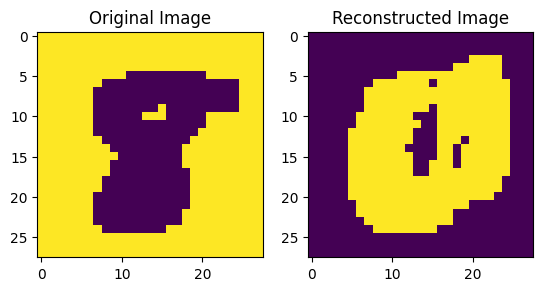

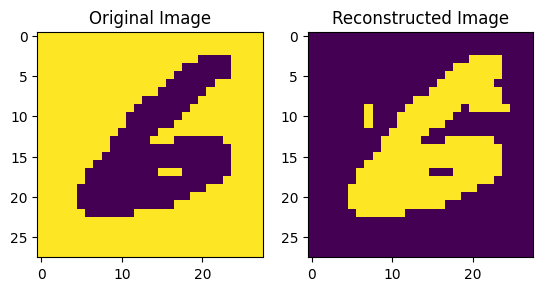

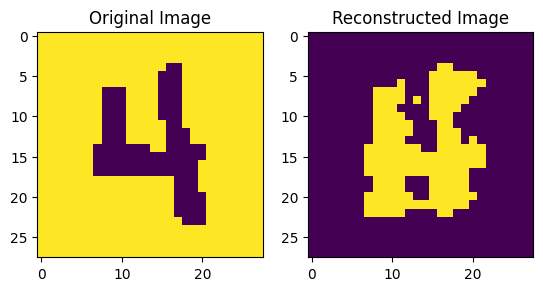

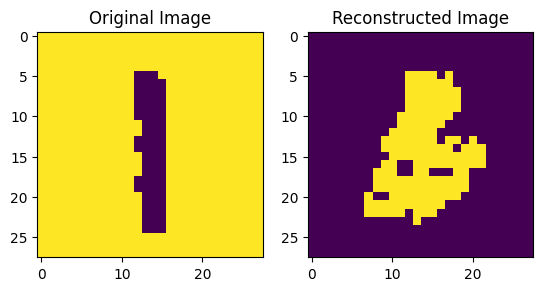

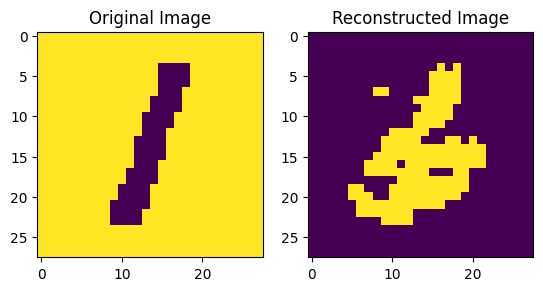

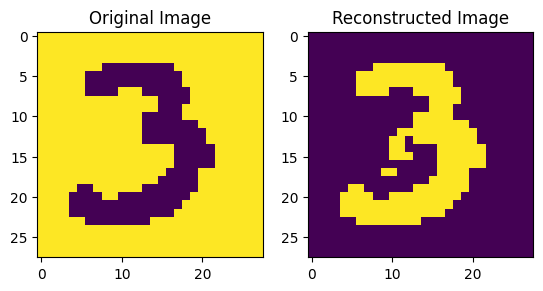

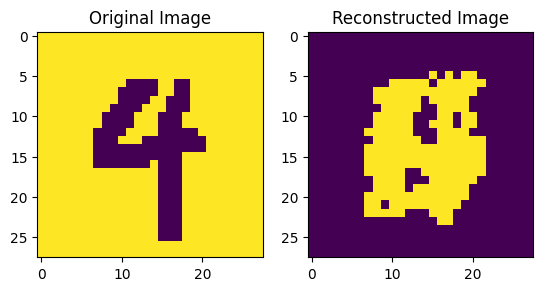

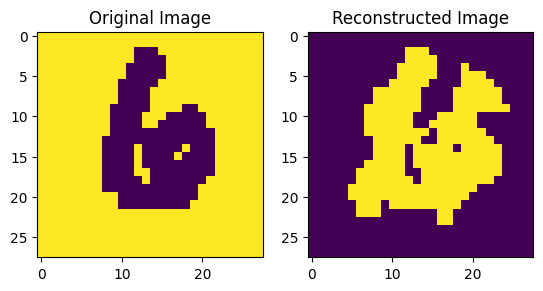

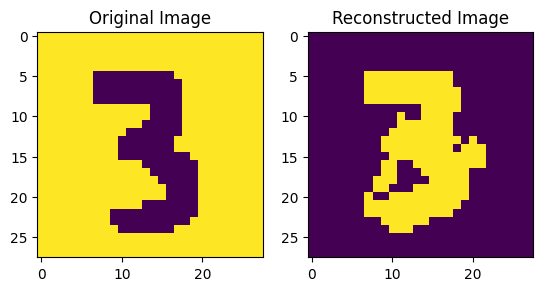

In [19]:
store_retrieve_N_images(10)

In [22]:
# this reconstruction error is not due to the capacity of the network but due
# to the fact that inputs are correlated
# the capacity is 0.15N, if the patterns are completely random and othgonal

In [29]:
# So we go to modern extension of Hopfield Network(Demircigil)
# but cost is O(n^3)

In [37]:
def demircigil_update_rule(z, xs):
  out = torch.zeros(len(z), 1)
  for i in range(len(z)):
    E_pos = 0
    E_neg = 0
    z_pos = deepcopy(z)
    z_neg = deepcopy(z)
    z_pos[i] = 1
    z_neg[i] = -1
    for x in xs:
      E_plus = x.T @ z_pos
      E_minus = x.T @ z_neg
      E_pos += torch.exp(E_plus/10) # /10 is aribtrary number for stable calculation purpose
      E_neg += torch.exp(E_minus/10)
    if E_pos > E_neg:
      out[i] = 1
    else:
      out[i] = -1
  return out

In [38]:
def image(imgs, N, break_val=-1):
  xs = [binarize(imgs[i, :].reshape(784,1)) for i in range(N)]
  for j in range(N):
    if break_val>0:
      if j > break_val:
        break
    halved_digit = zero_bottom(xs[j].reshape(784,1))
    out = demircigil_update_rule(halved_digit, xs)
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    imgs = [xs[j], halved_digit, out]
    titles = ["Original","Masked","Reconstruction"]
    for i, ax in enumerate(axs.flatten()):
      plt.sca(ax)
      plt.imshow(imgs[i].reshape(28,28))
      plt.title(titles[i])
    plt.show()

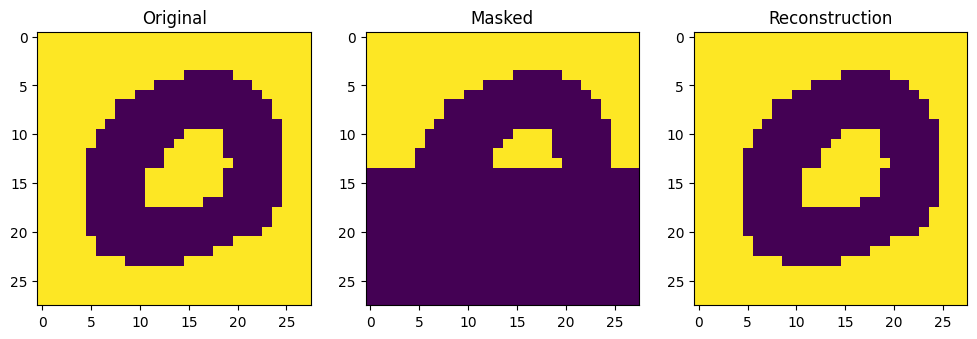

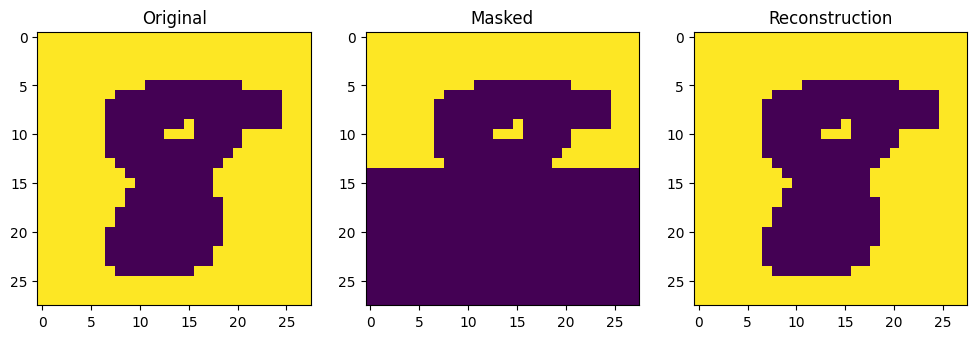

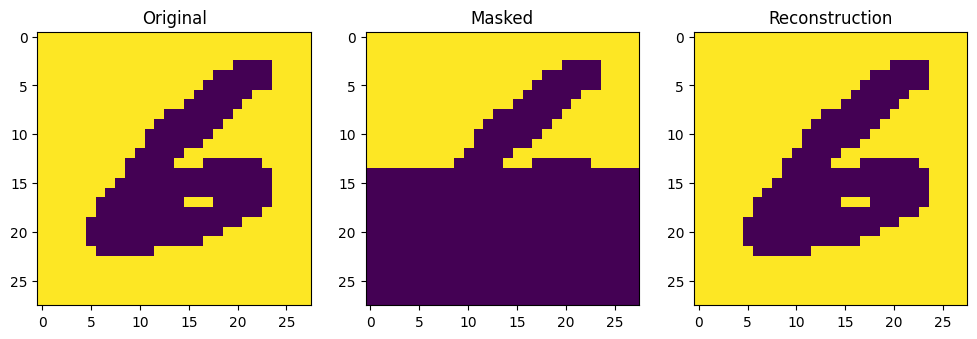

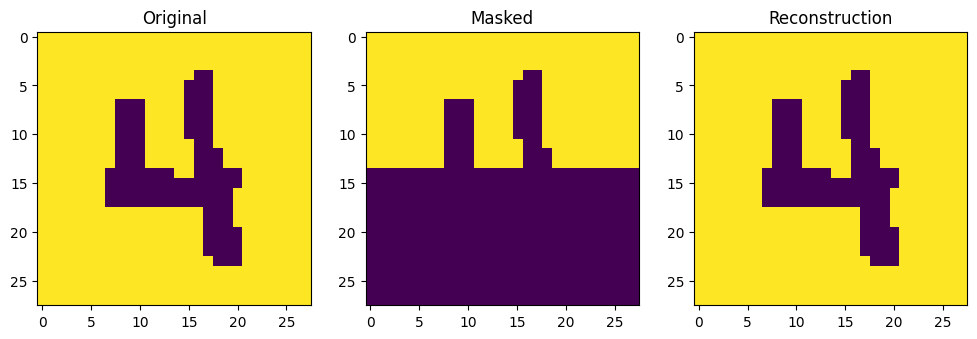

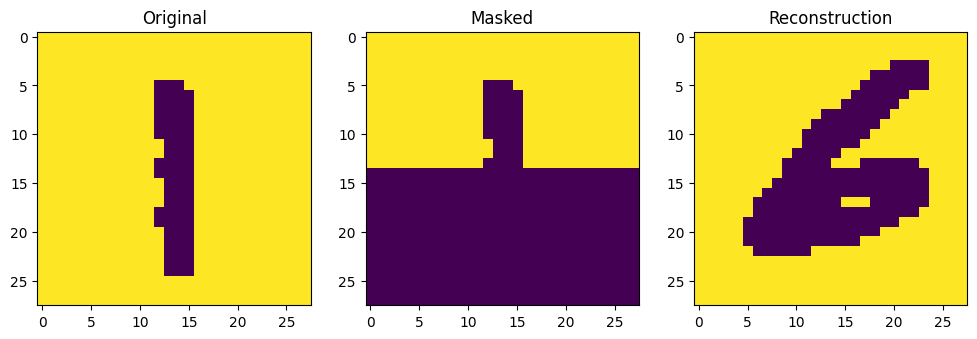

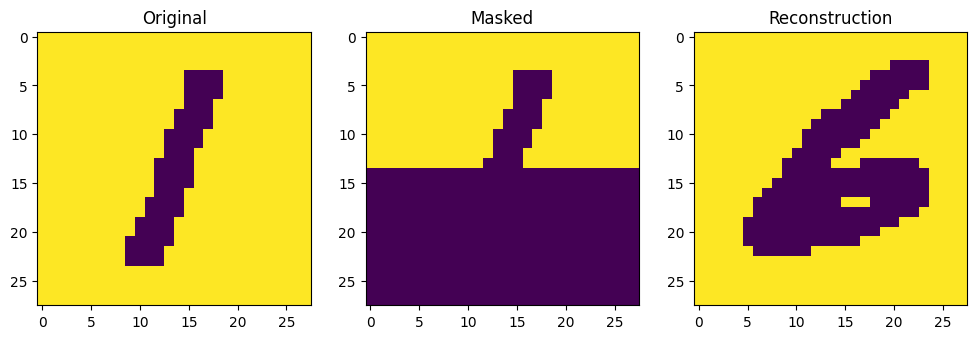

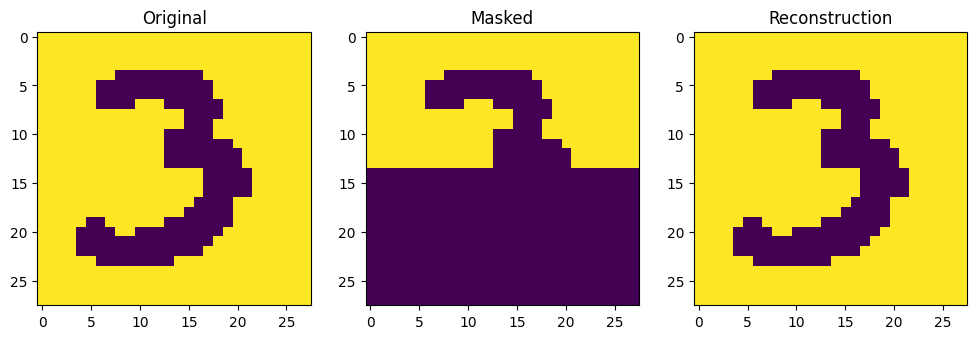

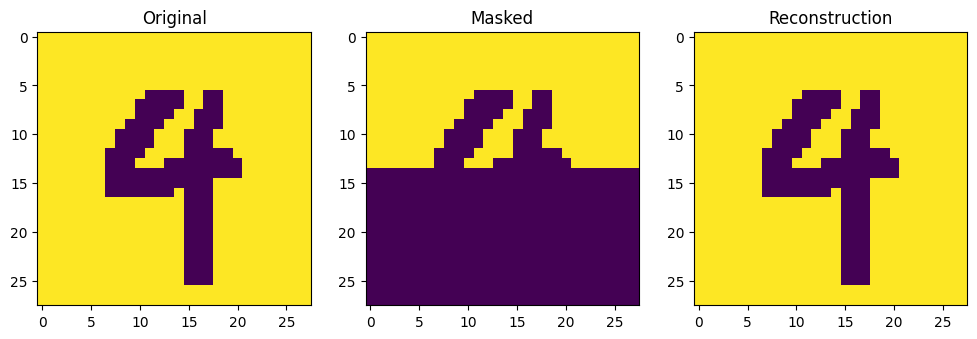

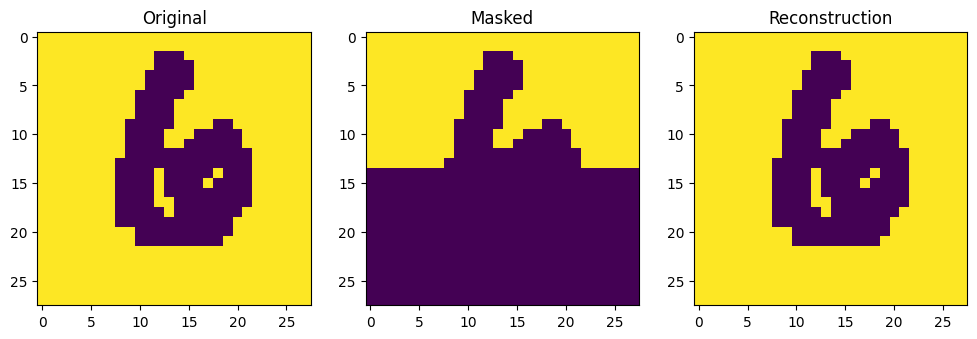

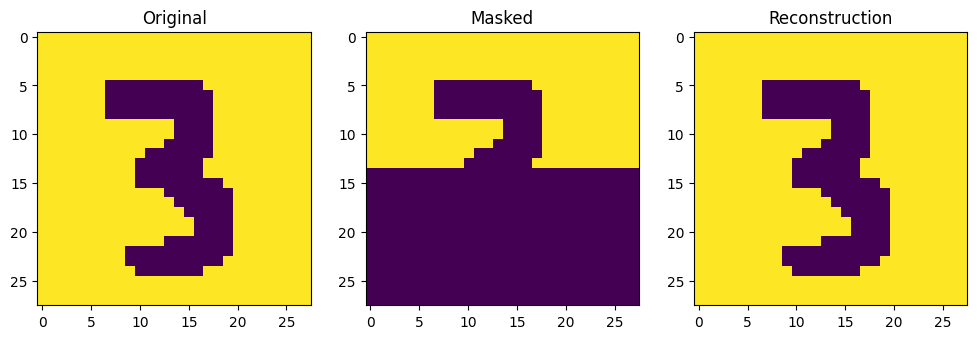

In [39]:
image(imgs,10)

In [40]:
# the above method is extremely slow as it looks for each combinations of values
# that will result in minimum energy. And that it only wokrs in case of binary ipnuts
# so now we move to a much generalized form and also much faster
# MODERN HOPFIELD NETWORK

In [41]:
def halve_continuous_img(img):
  H,W = img.reshape(28,28).shape
  i = deepcopy(img.reshape(28,28))
  i[H//2:H, :] = 0
  return i

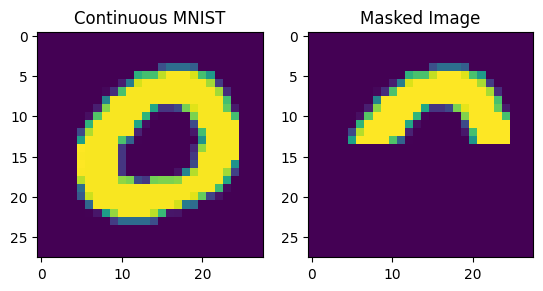

In [42]:
xs = [imgs[i,:] for i in range(100)]
plt.subplot(1,2,1)
plt.imshow(xs[0].reshape(28,28))
plt.title("Continuous MNIST")
halved_img = halve_continuous_img(xs[0])
plt.subplot(1,2,2)
plt.title("Masked Image")
plt.imshow(halved_img)
plt.show()

In [43]:
def continuous_rule(X,z,beta):
  return X.T@F.softmax(beta * X @z, dim=0)

def retreive_store(imgs, N, beta=8, num_plot=5):
  X = imgs[0:N, :]
  for j in range(num_plot):
    z=halve_continuous_img(X[j,:]).reshape(784,1)
    out = continuous_rule(X,z,beta)
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    imgs = [X[j,:], z, out]
    titles = ["Original","Masked","Reconstruction"]
    for i, ax in enumerate(axs.flatten()):
      plt.sca(ax)
      plt.imshow(imgs[i].reshape(28,28))
      plt.title(titles[i])
    plt.show()

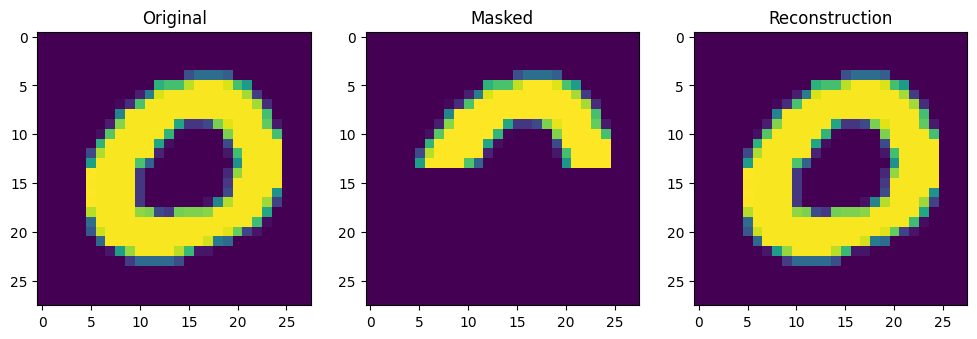

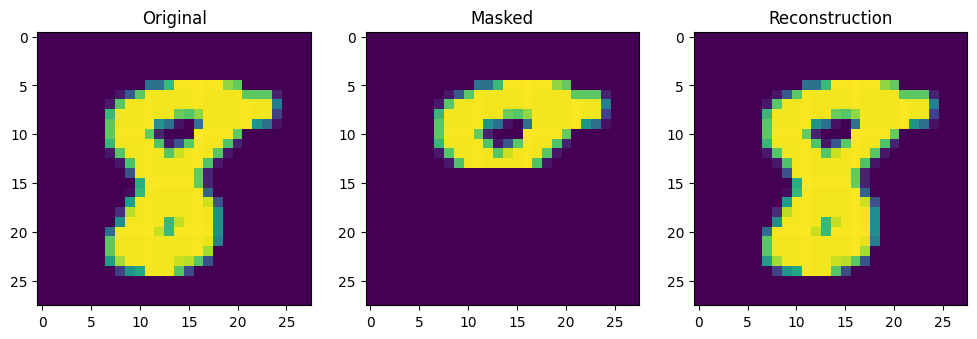

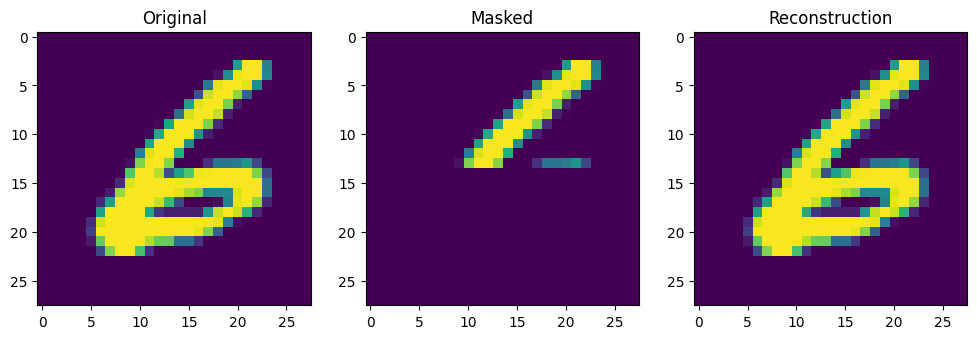

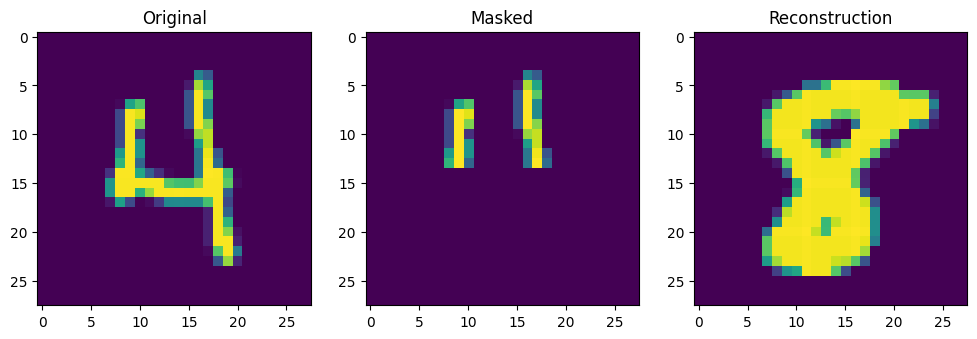

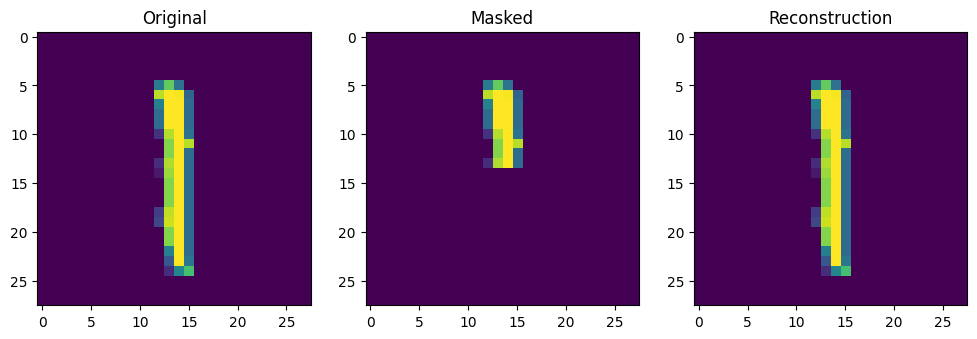

In [45]:
retreive_store(imgs,10)

Beta:  0.1


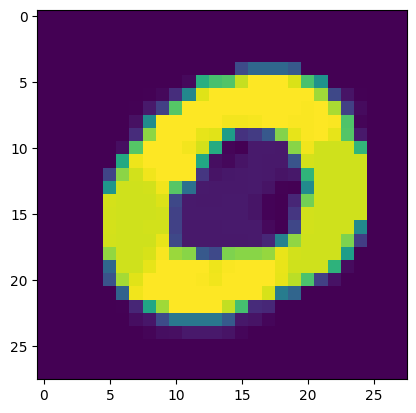

Beta:  0.2


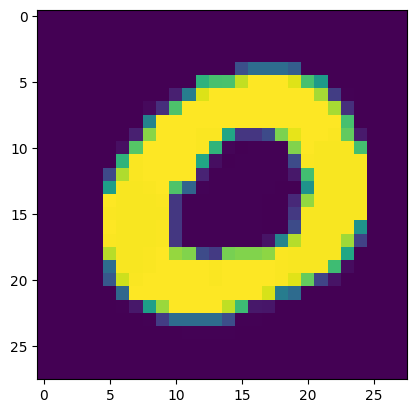

Beta:  0.5


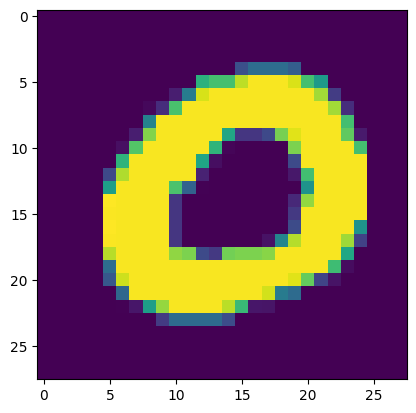

Beta:  1


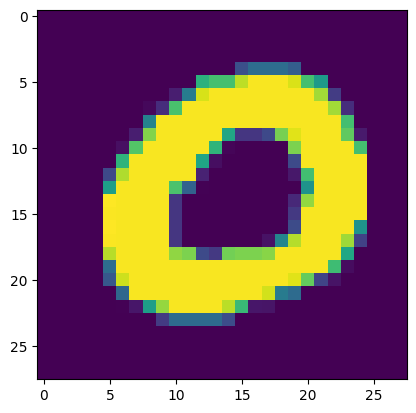

Beta:  2


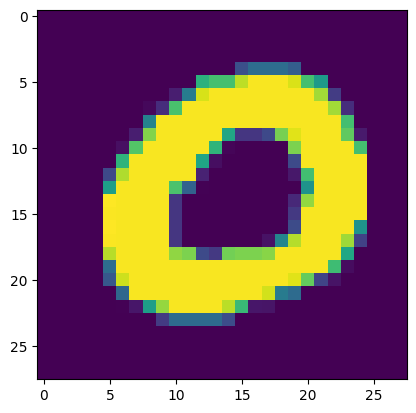

Beta:  4


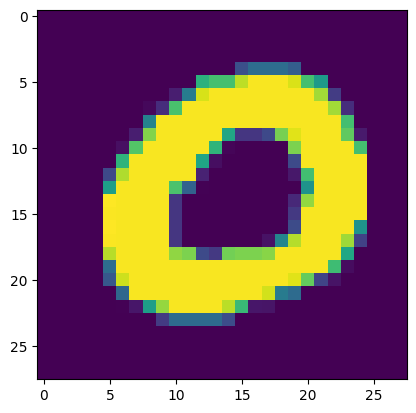

Beta:  8


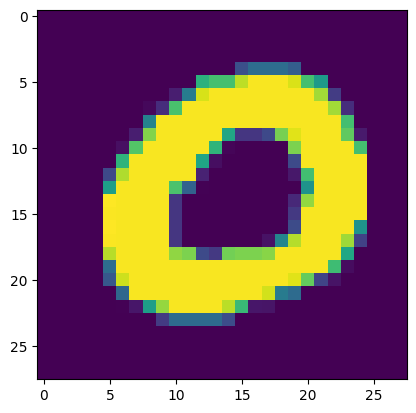

In [47]:
betas = [0.1,0.2,0.5,1,2,4,8]
X = imgs[0:10,:]
z = halve_continuous_img(X[0,:]).reshape(784,1)
for beta in betas:
  print("Beta: ", beta)
  out = continuous_rule(X,z,beta)
  out = out.reshape(28,28)
  plt.imshow(out)
  plt.show()

In [202]:
memories = [
    "the cat sat on the mat",
    "the dog ran in the park",
    "artificial intelligence is fascinating",
    "machine learning requires data"
]


In [203]:
def build_vocab(sentences):
  words = set()
  for sent in sentences:
    words.update(sent.lower().split())
  return sorted(list(words))

In [204]:
import numpy as np

In [205]:
def text2vec(text, vocab):
  words = text.lower().split()
  vector = np.zeros(len(vocab))

  for word in words:
    if word in vocab:
      idx = vocab.index(word)
      vector[idx] += 1
    if np.linalg.norm(vector) > 0:
        vector = vector / np.linalg.norm(vector)
    return vector

In [206]:
def store_memories(sentences):
  vocab = build_vocab(sentences)

  memory_vec = []
  for sent in sentences:
    vec = text2vec(sent, vocab)
    memory_vec.append(vec)
  M = np.array(memory_vec)
  return M, vocab

In [207]:
def hopfield(query, M, vocab, beta=5):
  query_vec = text2vec(query, vocab)
  sim = M@query_vec
  a = np.exp(beta*sim)
  a = a/np.sum(a)
  return a@M

In [208]:
def vec2text(vec, vocab, top_k=5):
  top = np.argsort(vec)[-top_k:][::-1]
  words = [vocab[i] for i in top if vec[i] > 0.1]
  return ' '.join(words)

In [209]:
def corrupt_text(text, rate=0.3):
  words = text.split()
  dell = int(len(words)*rate)
  idx = np.random.choice(len(words), dell, replace=False)
  aa =  ['___' if i in idx else word for i, word in enumerate(words)]
  return " ".join(aa)


In [210]:
M, vocab = store_memories(memories)

In [215]:
vocab

['artificial',
 'cat',
 'data',
 'dog',
 'fascinating',
 'in',
 'intelligence',
 'is',
 'learning',
 'machine',
 'mat',
 'on',
 'park',
 'ran',
 'requires',
 'sat',
 'the']

In [217]:
M.shape

(4, 17)

In [211]:
original = "the cat sat on the mat"

In [212]:
query = corrupt_text(original, rate=0.4)

In [213]:
retrieved_vec = hopfield(query, M, vocab, beta=5)

In [214]:
vec2text(retrieved_vec,vocab)

'the'